# Ví dụ về Hồi quy Logistic

Trong bài này, chúng ta sẽ sẽ thử nghiệm việc cài đặt mô hình `Hồi quy Logistic` thông qua ví dụ `chẩn đoán ung thư`:
- Dữ liệu được sử dụng là dataset có sẵn từ thư viện sklearn
- Dữ liệu trên là dữ liệu đã biết, ta dùng để  huấn luyện ra mô hình hồi quy logistic xấp xỉ tốt nhất với chúng
- Sử dụng mô hình để  chẩn đoán với dữ liệu mới

### Đầu tiên ta khai báo các thư viện sẽ sử dụng

In [1]:
import numpy as np #numpy là thư viện giúp thao tác linh hoạt hơn trên dữ liệu
import matplotlib.pyplot as plt #pyplot giúp mô tả dữ liệu thông qua các biểu đồ trực quan

#Trong bài này, chúng ta sẽ sử dụng dataset và mô hình sẵn của sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score #hàm để đo độ chính xác của mô hình

### Nạp dữ liệu và thể hiện lên biểu đồ
Trong bộ dữ liệu, 10 chỉ số được sử dụng chẩn đoán ung thư bao gồm các chỉ số liên quan đến nhân tế bào (bán kính, kết cấu, chu vi, diện tích, độ mịn, độ nén, độ lõm, số điểm lõm, mức độ đối xứng ,kích thước fractal). Với mục đích thể hiện tốt nhất hiệu quả của phương pháp và để dễ dàng biểu diễn lên biểu đồ , chúng ta chỉ sử dụng hai chỉ số là bán kính và độ lõm của nhân tế bào.

Số ác tính:  212 . Số lành tính:  357


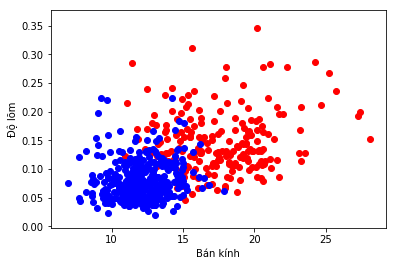

In [2]:
samples = datasets.load_breast_cancer()# chúng ta nạp dữ liệu để bắt đầu thao tác
X = samples.data[:,0:6:5] #Chúng ta giữ lại 2 chỉ số là bán kính và độ lõm của nhân tế bào
y = samples.target #Kết quả chẩn đoán bộ chỉ số  cho kết quả Lành tính hay không

M_class=np.array([X[i] for i in range(len(y)) if y[i]==0])#Dữ liệu của nhóm Ác tính (malignant)
B_class=np.array([X[i] for i in range(len(y)) if y[i]==1])#Dữ liệu của nhóm Lành tính (benign)
print("Số ác tính: ",len(M_class),". Số lành tính: ",len(B_class)) #Số lượng các phần tử của hai nhóm

plt.xlabel("Bán kính")
plt.ylabel("Độ lõm")
plt.scatter(M_class[:,0],M_class[:,1],color='red')
plt.scatter(B_class[:,0],B_class[:,1],color='blue')


### Tạo hàm xấp xỉ dữ liệu đã biết với phương pháp hồi quy logistic

Nhìn trên biểu đồ, ta có thể  thấy hai nhóm có sự tách biệt rõ ràng về hai chỉ số. Mô hình Hồi quy Logistic có dạng `y=F(X)` cần được huấn luyện với dữ liệu trên. Với `X` thuộc nhóm `Lành tính`, `y` tiến gần về  `1` và `y` tiến về `0` trong trường hợp `Ác tính` . Thật may, với `sklearn`, chúng ta có thể làm được điều đó chỉ với một vài dòng code. 

Đầu tiên, ta khai báo một mô hình `Hồi quy logistic` từ `sklearn`

In [3]:
logreg = LogisticRegression()

Tiếp theo, ta cung cấp dữ liệu đã biết để huấn luyện mô hình bằng phương thức `fit()` .

In [4]:
logreg.fit(X, y)

/home/thanhnh/.conda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Vậy là chúng ta đã có mô hình xấp xỉ tốt nhất với dữ liệu đã cho. Giờ ta sẽ biểu diễn khả năng dự đoán của mô hình thông qua biểu đồ:

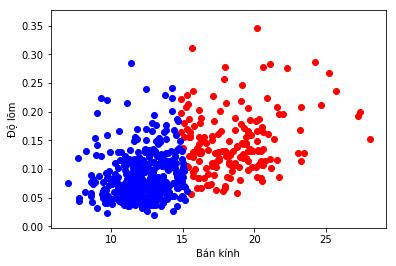

In [5]:
plt.xlabel("Bán kính")
plt.ylabel("Độ lõm")
y_pred=logreg.predict(X)
M_class_pred=np.array([X[i] for i in range(len(y)) if y_pred[i]==0])#Dự đoán nhóm Ác tính (malignant)
B_class_pred=np.array([X[i] for i in range(len(y)) if y_pred[i]==1])#Dự đoán của nhóm Lành tính (benign)
plt.scatter(M_class_pred[:,0],M_class_pred[:,1],color='red')
plt.scatter(B_class_pred[:,0],B_class_pred[:,1],color='blue')

So sánh hai hình vẽ, ta có thể thấy mặc dù mô hình đã dự đoán tốt nhưng các điểm ở biên không hoàn toàn giống với dữ liệu. Ta tính độ chính xác của mô hình để xác nhận một lần nữa:

In [6]:
accuracy_score(y, y_pred)

0.8892794376098418

Như vậy chỉ với 2 chỉ số, mô hình đã dự đoán sát so với dữ liệu là 88.93%

### Sử dụng mô hình để chẩn đoán ung thư

Tiếp theo, với mô hình đã có, ta sẽ tiến hành chẩn đoán ung thư với các chỉ số (R-Bán kính, C-Độ lõm):
- R=16.5, C=0.078
- R=15.2, C=0.241
- R=13.9, C=0.013

In [13]:
need_prediction=[[16.5,0.078],[15.2,0.241],[13.9,0.013]]
pred=logreg.predict(need_prediction)
value={0:"ác tính",1:"lành tính"}
for i,element in enumerate(need_prediction):
    print(f"Bệnh nhân có chỉ số  (Bán kính, Độ lõm nhân tế bào) là ({element[0]:.1f}, {element[1]:.3f}) có kết quả {value[pred[i]] :s} với ung thư")

Bệnh nhân có chỉ số  (Bán kính, Độ lõm nhân tế bào) là (16.5, 0.078) có kết quả ác tính với ung thư
Bệnh nhân có chỉ số  (Bán kính, Độ lõm nhân tế bào) là (15.2, 0.241) có kết quả ác tính với ung thư
Bệnh nhân có chỉ số  (Bán kính, Độ lõm nhân tế bào) là (13.9, 0.013) có kết quả lành tính với ung thư
